# *Bankers in the Ivory Tower*

### By Charlie Eaton

### Figure 4.6: Annual donations and private equity and hedge fund board members

In [1]:
*ssc install blindschemes

In [2]:
use data/d4_2_4_6_board_cae_nacubo.dta, clear
drop if year>2016



(60 observations deleted)


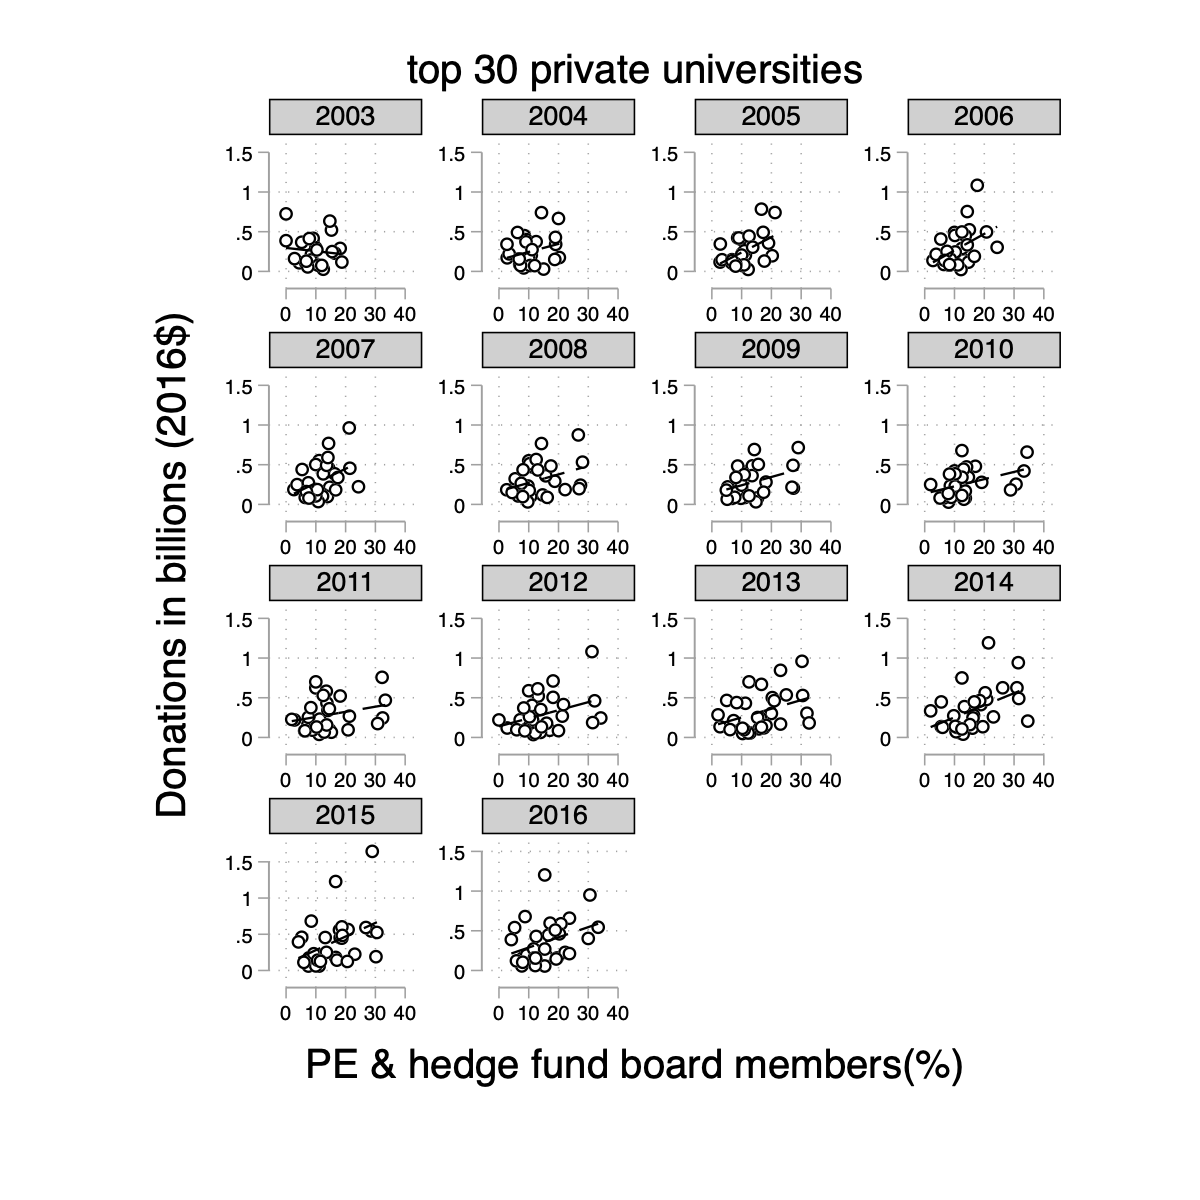




file /Users/Charlie/Dropbox/Stata_Notebooks/Bankers/Chapter 4 - The Top -
    Endowments/figures/f4_6_private_donations_board.pdf saved as PDF format


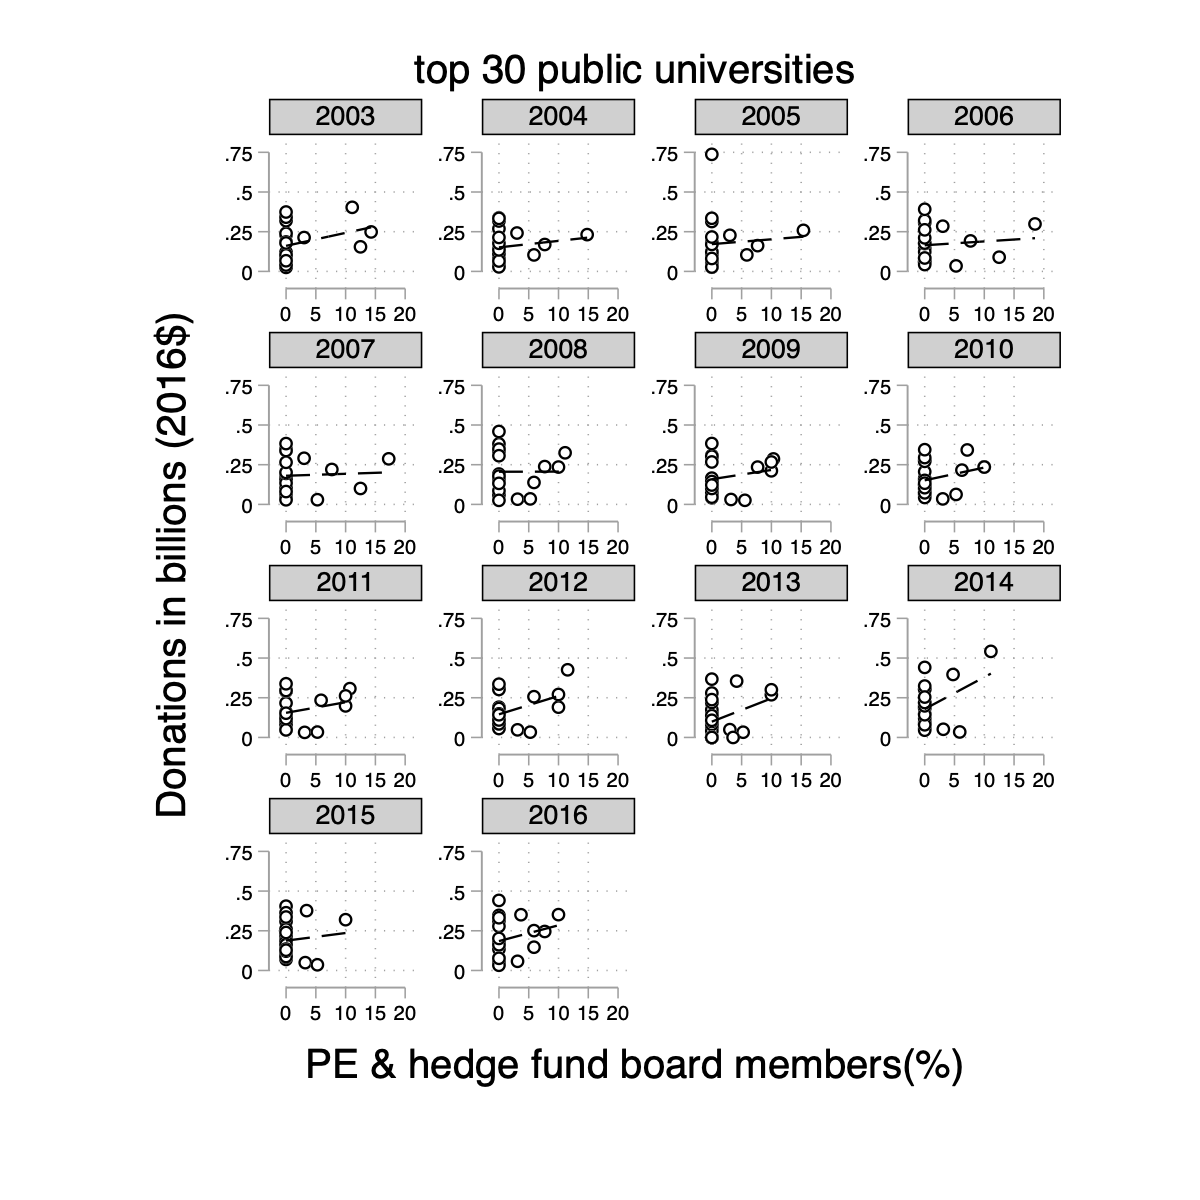




file /Users/Charlie/Dropbox/Stata_Notebooks/Bankers/Chapter 4 - The Top -
    Endowments/figures/f4_6_public_donations_board.pdf saved as PDF format


In [3]:
tw (scatter donatebillions pctalt if control==2 & year<2017, msym(O) mc(black) mfc(white)) ///
	(lfit donatebillions pctalt if control==2, lp(dash) lc(black)), ///
		by(year, rescale iylabel ixlabel imargin(zero) iscale(.65) row(4) legend(off) title(top 30 private universities) note(" ")) ///
		ytitle("Donations in billions (2016$)") ///
		xtitle(PE & hedge fund board members(%)) ylab(0(.5)1.5)  xlabel(0(10)40) ///
		xsize(4) aspect(1) name(private_board_hedge, replace) scheme(plotplain)
graph export figures/f4_6_private_donations_board.pdf, replace

tw (scatter donatebillions pctalt if control==1 & year<2017, msym(O) mc(black) mfc(white)) ///
	(lfit donatebillions pctalt if control==1, lp(dash) lc(black)), ///
		by(year, rescale iylabel ixlabel imargin(zero) iscale(.65) row(4) legend(off) title(top 30 public universities) note(" ")) ///
		ytitle("Donations in billions (2016$)") ///
		xtitle(PE & hedge fund board members(%)) ylab(0(.25).75) xlabel(0(5)20) ///
		xsize(4) aspect(1) name(public_board_hedge, replace) scheme(plotplain)
graph export figures/f4_6_public_donations_board.pdf, replace

In [4]:
xtset unitid year
sort unitid year
gen f1alt_invest_p = f1.alt_invest_p if unitid==f1.unitid



Panel variable: unitid (unbalanced)
 Time variable: year, 2003 to 2016
         Delta: 1 unit


(312 missing values generated)


In [5]:
est clear
qui eststo: regress f1.logdonations pctalt i.year, cluster(unitid)
qui eststo: regress f1.logdonations pctalt endow_assets_c_log  i.year, cluster(unitid)
qui eststo: regress f1.logdonations pctalt endow_assets_c_log alt_invest_p i.year, cluster(unitid)
qui eststo: regress f1.logdonations pctalt endow_assets_c_log alt_invest_p acceptrate i.year, cluster(unitid)
qui eststo: regress f1.logdonations pctalt endow_assets_c_log alt_invest_p acceptrate i.control i.year, cluster(unitid)

In [6]:
%html esttab, keep(pctalt endow_assets_c_log alt_invest_p acceptrate 2.control) html se star(+ 0.10 * 0.05 ** .01)

This front-end or document format cannot display HTML

In [7]:
xtset unitid year


Panel variable: unitid (unbalanced)
 Time variable: year, 2003 to 2016
         Delta: 1 unit


In [8]:
reghdfe f1.logdonations pctalt acceptrate ///
 , absorb(unitid ) cluster(unitid)

(dropped 6 singleton observations)
(MWFE estimator converged in 1 iterations)

HDFE Linear regression                            Number of obs   =        658
Absorbing 1 HDFE group                            F(   2,     52) =      10.67
Statistics robust to heteroskedasticity           Prob > F        =     0.0001
                                                  R-squared       =     0.4670
                                                  Adj R-squared   =     0.4193
                                                  Within R-sq.    =     0.0045
Number of clusters (unitid)  =         53         Root MSE        =     0.9688

                                (Std. err. adjusted for 53 clusters in unitid)
------------------------------------------------------------------------------
F.           |               Robust
logdonations | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
      pctalt | 

In [9]:
reghdfe f1.logdonations pctalt alt_invest_p acceptrate ///
 endow_assets_c_log, absorb(unitid ) cluster(unitid)

(dropped 7 singleton observations)
(MWFE estimator converged in 1 iterations)

HDFE Linear regression                            Number of obs   =        477
Absorbing 1 HDFE group                            F(   4,     51) =       2.76
Statistics robust to heteroskedasticity           Prob > F        =     0.0376
                                                  R-squared       =     0.4126
                                                  Adj R-squared   =     0.3359
                                                  Within R-sq.    =     0.0083
Number of clusters (unitid)  =         52         Root MSE        =     1.0036

                                 (Std. err. adjusted for 52 clusters in unitid)
-------------------------------------------------------------------------------
F.            |               Robust
 logdonations | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
--------------+----------------------------------------------------------------
       pct